# Single Cell Average Population Constructor

building a gene by cell type matrix notebook so we can use cellanneal for the context of our problem

In [2]:
# library imports
import scanpy as sc
import pandas as pd
import numpy as np
import os
from matplotlib.pyplot import rc_context

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=150, color_map='viridis')
sc.logging.print_versions()
from ctxbio.scdata import SCData

-----
anndata     0.7.8
scanpy      1.8.2
sinfo       0.3.1
-----
PIL                 9.4.0
anndata             0.7.8
asttokens           NA
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bottleneck          1.3.5
cffi                1.14.6
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.2
ctxbio              0.0.1
cycler              0.10.0
cython_runtime      NA
dask                2023.1.0
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
google              NA
h5py                3.7.0
hypergeom_ufunc     NA
igraph              0.9.11
ipykernel           6.21.3
ipython_genutils    0.2.0
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
jupyter_server      1.23.4
kiwisolver          1.4.4
leidenalg           0.8.10
llvmlite            0.38.1
louvain             0.7.1
markupsafe          2.1.2
matplotlib          3.6.2
matpl

#### loading in Datasets

In [3]:
bulk_data_path ='/mnt/cbbi-data00/public_data/tanami_curation/'
sc_data_path1 = '/mnt/cbbi-data00/external_data/SCope2/Public/Autoimmunity/Martin_2019_CD.reanalyzed.h5ad'
sc_data_path2 = '/mnt/cbbi-data00/external_data/SCope2/AutoimmunityScreens/OxfordATAP/IBD/Prod/v10/ATAP_IBD.2021-04-16.v10.0b6.h5ad'

In [4]:
adata = sc.read_h5ad(sc_data_path1)

/opt/conda/envs/celsius/lib/python3.9/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/opt/conda/envs/celsius/lib/python3.9/site-packages/anndata/compat/__init__.py:180: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(


In [5]:
adata

AnnData object with n_obs × n_vars = 105621 × 32991
    obs: 'Chemistry', 'CyTOF', 'MICSSS', 'Patient.ID', 'Sample_ID', 'batch', 'sample', 'status', 'tissue', 'umi_counts', 'umi_counts_log', 'gene_counts', 'gene_counts_log', 'percent_mito', 'clusters', 'cell_types', 'compartments', 'cell_type2', 'cell_type'
    var: 'gene_ids'
    uns: 'cluster_entropies', 'louvain', 'meta_cols', 'mito_genes', 'neighbors', 'params', 'rank_genes_groups', 'ribo_genes', 'scVI_imputed_genes', 'species', 'units', 'valid_barcodes'
    obsm: 'X_tsne', 'X_umap', 'scVI_imputed_data', 'scVI_latent'
    obsp: 'distances', 'connectivities'

#### plotting the UMAP of our single cell with the annotated cell types

/opt/conda/envs/celsius/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


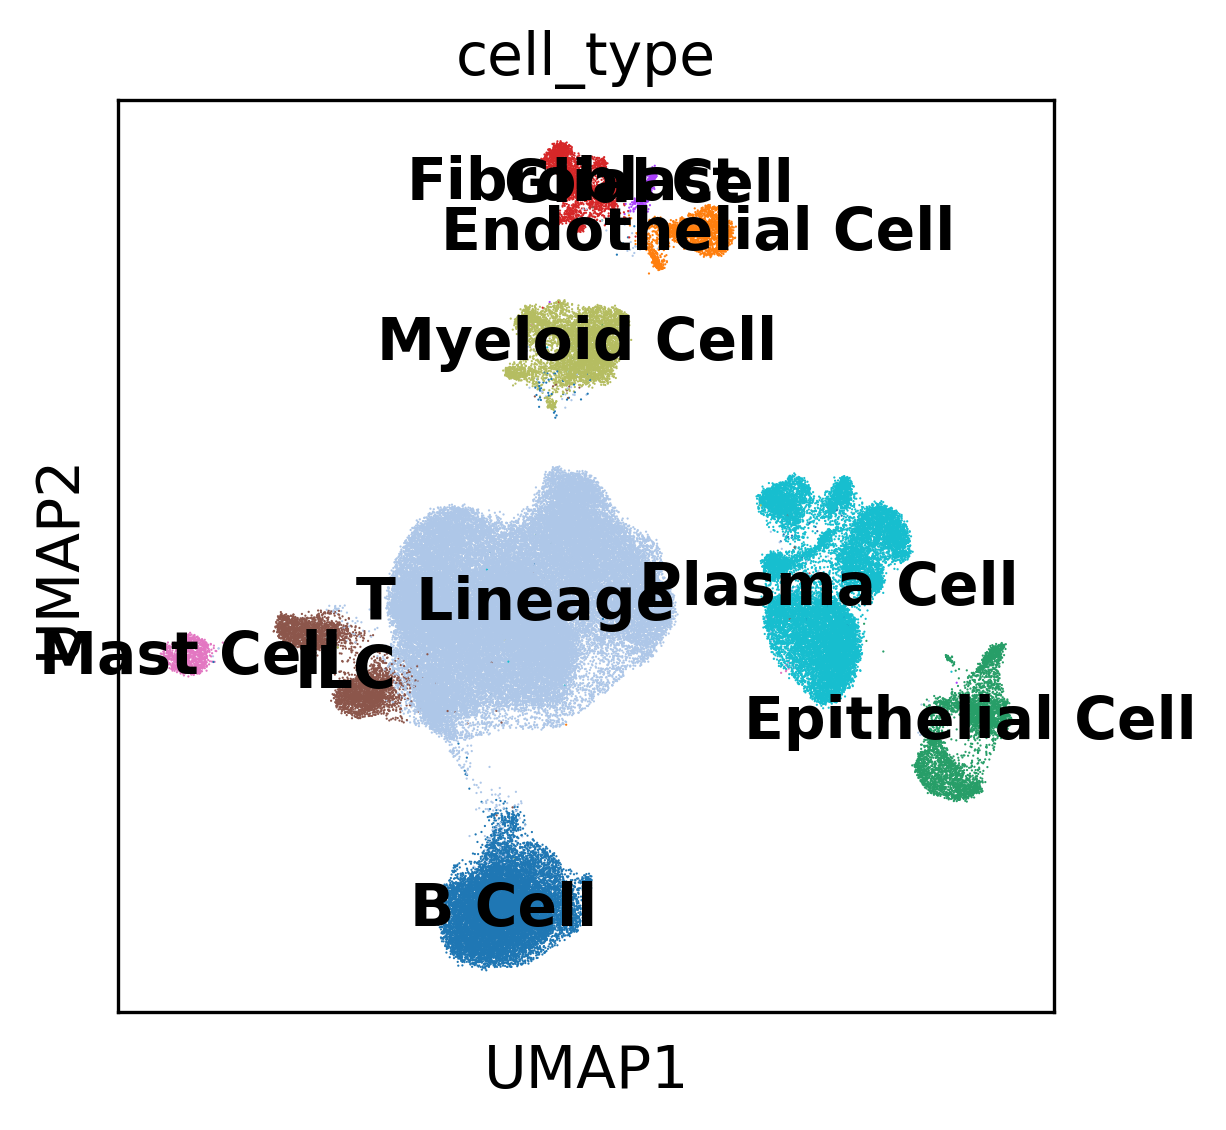

In [6]:
sc.pl.umap(adata, color='cell_type', legend_loc='on data')

In [7]:
x = SCData(adata)

In [9]:
x.diff_exp(groupby="cell_type")
# sort by assymetry

# scanpy scanpy.tl.rank_genes_groups

# pts output is interesting

ranking genes
    finished: added to `.uns['method=t-test || groupby=cell_type || n_cells=105621 || n_genes=32991']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:13)


,B Cell,Endothelial Cell,Epithelial Cell,Fibroblast,Glial Cell,ILC,Mast Cell,Myeloid Cell,Plasma Cell,T Lineage
0,AC091138.1,VIP,DEFB131A,AC034206.1,SLC5A7,FGF20,TPSAB1,IL27,IGLCOR22-2,TRAV23DV6
1,AC098483.1,C1QTNF9B,AP001554.1,FGF10,FOXD3,AL358613.1,MAS1L,CLEC6A,IGLVIV-66-1,TRAV8-4
2,AC108879.1,AL135960.1,GLRA4,AC026391.1,RHAG,SERPINA11,CPA3,ACOD1,IGLV2-28,TRAJ61
3,AC133065.1,C3orf36,CEACAM18,DIRC1,AP002833.1,KRT81,TPSB2,LINC01724,IGHV3-62,AL121748.1
4,COL19A1,LINC00840,UGT3A1,AL591501.1,CTNNA2,SH2D1B,CTSG,RFPL4AL1,IGKV2D-18,LINC02295
5,MS4A1,SLC10A6,CYP2C19,RSPO1,PCSK2,CYP26C1,ADCYAP1,AC092746.1,AL138812.1,TRAJ17
6,IGHD,AVPR2,AC010745.1,MMP27,FLRT1,AL137186.1,AL662860.1,LINC01262,IGKV1OR-2,TRAV10
7,AC107926.1,AC007743.1,TRIM40,LINC01324,CDH19,SNCB,PRG2,AL355922.1,AL590637.1,AC137810.1
8,TCL1A,TM4SF18,AC129507.2,TMEM190,NRXN1,KRT86,CMA1,AC087273.2,IGLVI-20,TRAV38-1
9,AL713998.1,ADGRL4,NEUROG3,AL136369.2,LRRTM1,NCR2,TPSD1,MS4A6E,IGKV1OR2-118,TRAV39


In [14]:
df = x.diff_exp(groupby='clusters', sortby='pvals')

In [15]:
x.score_signatures(df)

AttributeError: 'Styler' object has no attribute 'values'

#### Extract the cell type and subtype information

In [6]:
l1 = ref1.obs['cell_type2']
temp = l1.to_frame()
temp.reset_index()
temp.columns = ['cell_subtype']

l1 = ref1.obs['cell_type']
temp2 = l1.to_frame()
temp2.reset_index()
temp2.columns = ['cell_type']



In [ ]:
def train(training_data, gene_sig):
    '''
    Pass in training data and gene signature from same tissue to train models.

    Current models:
        Kassandra
        Cellanneal
        SVR
        ...
        add more at your own need
    
    Parameters:
        training data: training set to train models
        gene_sig: gene expression signatures typically needed for training
    
    Returns:
        currently returns 3 trained models

    '''

display some statistics

In [7]:
df = ref1.to_df()
df.describe()

index,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,AC114498.1,AL669831.2,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
count,105621.000000,105621.0,105621.0,105621.000000,105621.0,105621.0,105621.000000,105621.000000,105621.000000,105621.000000,...,105621.000000,105621.0,105621.000000,1.056210e+05,105621.000000,105621.000000,105621.000000,105621.000000,105621.0,105621.0
mean,0.000004,0.0,0.0,0.000355,0.0,0.0,0.000010,0.000002,0.000001,0.000010,...,0.000516,0.0,0.002217,6.065962e-07,0.006976,0.000695,0.002261,0.001209,0.0,0.0
std,0.001439,0.0,0.0,0.016857,0.0,0.0,0.003193,0.000591,0.000441,0.003349,...,0.018423,0.0,0.041297,1.971396e-04,0.071096,0.021654,0.040597,0.029897,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,0.467550,0.0,0.0,1.286650,0.0,0.0,1.037857,0.191937,0.143324,1.088535,...,1.423413,0.0,1.392639,6.406929e-02,1.474485,1.478130,1.894977,1.385785,0.0,0.0


In [8]:
df_ct = pd.concat([df,temp2], axis=1)
df_ct.index = df_ct['cell_type']

df_cst = pd.concat([df,temp], axis=1)
df_cst.index = df_cst['cell_subtype']


In [ ]:
cell_type = df_ct.index.unique()
cell_subtype = df_cst.index.unique()

In [ ]:
genes = df_ct.columns

In [ ]:
df_ct_final = pd.DataFrame(index=genes)

# Gene Signatures?
gene-wise mean across all cells with the same cell type label

In [15]:
# gets average gene expression for every cell type then gets the proportion of that gene expression by cell type
for cell in cell_type:
    temp = df_ct[df_ct['cell_type'] == cell]
    temp = temp.drop('cell_type',axis=1)
    temp = temp.T
    mean = temp.mean(axis=1)
    count = mean.sum()
    prop = mean/count
    df_ct_final[cell] = prop

In [16]:
df_ct_final = df_ct_final.drop("cell_type")

In [17]:
df_ct_final

,T Lineage,Fibroblast,B Cell,Plasma Cell,Myeloid Cell,Endothelial Cell,ILC,Mast Cell,Glial Cell,Epithelial Cell
MIR1302-2HG,0.000000e+00,0.000000e+00,0.000000e+00,6.340050e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
FAM138A,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
OR4F5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
AL627309.1,5.497870e-07,1.763997e-06,4.830835e-07,6.221682e-07,4.885745e-07,1.860453e-06,2.514961e-07,0.000000,0.000004,1.552333e-07
AL627309.3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
AC233755.2,1.294963e-07,6.188266e-07,3.882574e-07,8.285151e-06,8.616780e-07,0.000000e+00,0.000000e+00,0.000000,0.000000,6.977655e-08
AC233755.1,1.240772e-06,2.866408e-06,1.118643e-06,2.314549e-05,1.140669e-06,5.590848e-07,1.195324e-06,0.000000,0.000000,1.298207e-06
AC240274.1,1.115131e-06,1.465200e-05,9.986542e-07,7.620846e-07,3.497277e-06,6.718398e-06,1.816808e-06,0.000007,0.000005,3.052708e-06
AC213203.1,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00


In [22]:
df_ct_final.describe()

,T Lineage,Fibroblast,B Cell,Plasma Cell,Myeloid Cell,Endothelial Cell,ILC,Mast Cell,Glial Cell,Epithelial Cell
count,3.299100e+04,3.299100e+04,3.299100e+04,3.299100e+04,3.299100e+04,3.299100e+04,3.299100e+04,32991.000000,32991.000000,3.299100e+04
mean,3.031130e-05,3.031130e-05,3.031130e-05,3.031130e-05,3.031130e-05,3.031130e-05,3.031130e-05,0.000030,0.000030,3.031130e-05
std,1.664989e-04,1.146533e-04,1.823202e-04,1.711797e-04,1.349641e-04,1.087944e-04,1.511581e-04,0.000187,0.000119,1.147195e-04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
50%,3.779109e-07,8.699981e-07,3.147198e-07,4.690780e-07,4.735958e-07,7.272420e-07,4.250441e-07,0.000000,0.000000,5.083689e-07
75%,1.037935e-05,1.873975e-05,9.686273e-06,1.042771e-05,1.254684e-05,1.872239e-05,1.209482e-05,0.000010,0.000016,1.636153e-05
max,5.112721e-03,3.020125e-03,4.907676e-03,6.352176e-03,3.074493e-03,2.774156e-03,4.427813e-03,0.007010,0.003661,2.540174e-03


# Cell Subtype Gene Signature?

In [18]:
df_cst_final = pd.DataFrame(index=genes)

In [19]:
# gets average gene expression for every cell type then gets the proportion of that gene expression by cell type
for sub in cell_subtype:
    temp = df_cst[df_cst['cell_subtype'] == sub]
    temp = temp.drop('cell_subtype',axis=1)
    temp = temp.T
    mean = temp.mean(axis=1)
    count = mean.sum()
    df_cst_final[sub] = mean

In [20]:
df_cst_final = df_cst_final.drop("cell_type")

In [21]:
df_cst_final = df_cst_final.rename(columns={"nan": "other"})
df_cst_final

,T Cell CD8 Stem Cell Memory,Fibroblasts + Pericytes,T Cell Cycling CD4,T Cell CD4,B Cell,T Cell Th1,Plasma IgA,Myeloid,Plasma IgG,Endothelial,Plasmablast,T Cell CD8,ILC (NK),Plasma IgM,Mast Cell,Glial Cell,ILC 2/3,Epithelial,other,T Cell Cycling CD8
MIR1302-2HG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
FAM138A,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OR4F5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
AL627309.1,0.000348,0.001473,0.000117,0.000298,0.000271,0.000255,0.000408,0.000376,0.000518,0.001697,0.000034,0.000161,0.000000,0.000000,0.000000,0.002923,0.000346,0.000030,0.000293,0.000883
AL627309.3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC233755.2,0.000000,0.000517,0.000193,0.000000,0.000218,0.000267,0.002663,0.000662,0.006940,0.000000,0.004321,0.000000,0.000000,0.002550,0.000000,0.000000,0.000000,0.000109,0.000000,0.000000
AC233755.1,0.000867,0.002393,0.000825,0.000798,0.000628,0.000987,0.007333,0.000877,0.013746,0.000510,0.013262,0.000410,0.000216,0.011196,0.000000,0.000000,0.001403,0.001175,0.001177,0.000194
AC240274.1,0.000751,0.012234,0.000762,0.000225,0.000561,0.000191,0.000406,0.002688,0.000000,0.006127,0.000310,0.000891,0.000570,0.000461,0.002861,0.003966,0.001861,0.002533,0.003087,0.000848
AC213203.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_cst_final.descirbe()

write out data file

In [20]:
df_ct_final.to_csv('./example_data/sc_cell_type_mean_signature.csv')
df_cst_final.to_csv('./example_data/sc_cell_subtype_mean_signature.csv')

# PBMC File Extractor

In [82]:
# reads in data files
ct_df = pd.read_csv('./cell_types.csv',index_col=0)
sc_data = pd.read_csv('./normalized_dataset.csv',index_col=0)
sc_data = sc_data.T

# combines single cell data with cell type data
data = pd.concat([sc_data,ct_df], axis=1)

# prepares to build gene signature dataframe
cell_type = data['cellType_final'].unique()
genes = data.columns
df = pd.DataFrame(index=genes)

# gets average gene expression for every cell type then gets the proportion of that gene expression by cell type
for cell in cell_type:
    temp = data[data['cellType_final'] == cell]
    temp = temp.drop('cellType_final',axis=1)
    temp = temp.T
    mean = temp.mean(axis=1)
    count = mean.sum()
    df[cell] = mean

# drops NaN row
df = df.drop("cellType_final")

# transpose
df= df.T

# need to take the transpose of matrix to sum up rows
df.loc['B_cells'] = df.loc[['B', 'B-naive']].sum()
df.loc['CD4_T_cells'] = df.loc[['CD4', 'CD4-naive']].sum()
df.loc['Monocytes'] = df.loc[['CD14-PPBP', 'CD14', 'CD16']].sum()
df.loc['CD8_T_cells'] = df.loc[['CD8', 'CD8-naive']].sum()

# transpose
df = df.T


# renaming columns for benchmarking purposes
df = df.rename(columns={"undefined": "other"})
df = df.rename(columns={"NK": "NK_cells"})
df = df.rename(columns={"Treg": "Tregs"})
df = df.rename(columns={"pDC": "PDC"})
df = df.rename(columns={"cDC": "CDC"})
df = df.drop("B", axis=1)
df = df.drop("B-naive", axis=1)
df = df.drop("CD4", axis=1)
df = df.drop("CD4-naive", axis=1)
df = df.drop("T_undef", axis=1)
df= df.drop("platelet_cont",axis=1)
df= df.drop("CD14-PPBP", axis=1)
df= df.drop("CD14", axis=1)
df= df.drop("CD8-naive", axis=1)
df= df.drop("CD8", axis=1)
df= df.drop("CD16", axis=1)

# write out to csv file
df.to_csv('./example_data/sc_PBMC_gene_signature_test.csv')
